**Curso Aprendiza Automatico**

Prof. Felipe Meza

Estudiante: Sergio Castillo <sergio.cs87@yahoo.com>

*Tarea 3 - 12 agosto 2019*


Aplicación de aprendizaje automático

In [0]:
import pandas as pd
import sklearn

El dataset a continuación fue tomado de https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

El mismo contiene los datos históricos de pagos de tarjetas de crédito de 30 mil clientes en Taiwan.
El objetivo del estudio es utilizar estos datos para tratar de predecir si la cuenta del cliente entrará a estado incobrable.

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/scmaverick/DataScienceTEC/master/AprendizajeAutomatico/default_of_credit_card_clients.csv")
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
print("Has null values: ", df.isnull().values.any())
df.head()

Has null values:  False


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Descripción de las columnas:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.
This study reviewed the literature and used the following 23 variables as explanatory variables:

ID: el ID del cliente, número consecutivo ficticio

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Se eliminará el ID al ser irrelevante para el estudio, y se tratará de predecir el valor de Y

In [16]:
data_x = df.drop(["ID", "Y"], axis = 1)
data_y = df["Y"]
print(data_x.describe())
print(data_x.head())
data_y.head()

                   X1            X2  ...            X22            X23
count    30000.000000  30000.000000  ...   30000.000000   30000.000000
mean    167484.322667      1.603733  ...    4799.387633    5215.502567
std     129747.661567      0.489129  ...   15278.305679   17777.465775
min      10000.000000      1.000000  ...       0.000000       0.000000
25%      50000.000000      1.000000  ...     252.500000     117.750000
50%     140000.000000      2.000000  ...    1500.000000    1500.000000
75%     240000.000000      2.000000  ...    4031.500000    4000.000000
max    1000000.000000      2.000000  ...  426529.000000  528666.000000

[8 rows x 23 columns]
       X1  X2  X3  X4  X5  X6  X7  ...    X17   X18    X19    X20   X21   X22   X23
0   20000   2   2   1  24   2   2  ...      0     0    689      0     0     0     0
1  120000   2   2   2  26  -1   2  ...   3261     0   1000   1000  1000     0  2000
2   90000   2   2   2  34   0   0  ...  15549  1518   1500   1000  1000  1000  5000
3 

0    1
1    1
2    0
3    0
4    0
Name: Y, dtype: int64

In [17]:
#x_training and x_quality datasets for training and testing 80-20
from sklearn.model_selection import train_test_split
Xt, Xq, yt, yq = train_test_split(data_x, data_y, random_state = 5, train_size = 0.8)
print(Xt.shape)
print(Xq.shape)

(24000, 23)
(6000, 23)


In [0]:
#Definimos algunas funciones genericas para facilitar el entrenamiento y prueba de los modelos
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Verificar efectividad del modelo
def predictionAccuracy(x, y, model):
  yp = model.predict(x)
  return accuracy_score(y, yp)

def printAccuracy(r, hyperParamName):
  plt.plot(r.index, r[0], color='g', label="training acc")
  plt.plot(r.index, r[1], color='orange', label="testing acc")
  plt.xlabel(hyperParamName)
  plt.ylabel('Accuracy')
  plt.xticks(r.index)
  plt.show()

def trainAndPredict(trainFunc, hyperParamName, trainRange):
  r = pd.DataFrame()
  for i in trainRange:
    model = trainFunc(Xt, yt, i)
    accQ = predictionAccuracy(Xq, yq, model)
    accT = predictionAccuracy(Xt, yt, model)
    r[i] = [accT, accQ]
    print("Using " + hyperParamName + " =", i, "Accuracy in training:", accT, "Accuracy in testing:", accQ)
  r = r.transpose()
  printAccuracy(r, hyperParamName)

Using max_depth = 1 Accuracy in training: 0.8187916666666667 Accuracy in testing: 0.8228333333333333
Using max_depth = 2 Accuracy in training: 0.8192083333333333 Accuracy in testing: 0.8238333333333333
Using max_depth = 3 Accuracy in training: 0.8224583333333333 Accuracy in testing: 0.8215
Using max_depth = 4 Accuracy in training: 0.8234583333333333 Accuracy in testing: 0.823
Using max_depth = 5 Accuracy in training: 0.8248333333333333 Accuracy in testing: 0.823
Using max_depth = 6 Accuracy in training: 0.8272083333333333 Accuracy in testing: 0.8201666666666667
Using max_depth = 7 Accuracy in training: 0.8310416666666667 Accuracy in testing: 0.8211666666666667
Using max_depth = 8 Accuracy in training: 0.8362916666666667 Accuracy in testing: 0.822
Using max_depth = 9 Accuracy in training: 0.843125 Accuracy in testing: 0.8163333333333334
Using max_depth = 10 Accuracy in training: 0.850875 Accuracy in testing: 0.8148333333333333
Using max_depth = 11 Accuracy in training: 0.860125 Accuracy

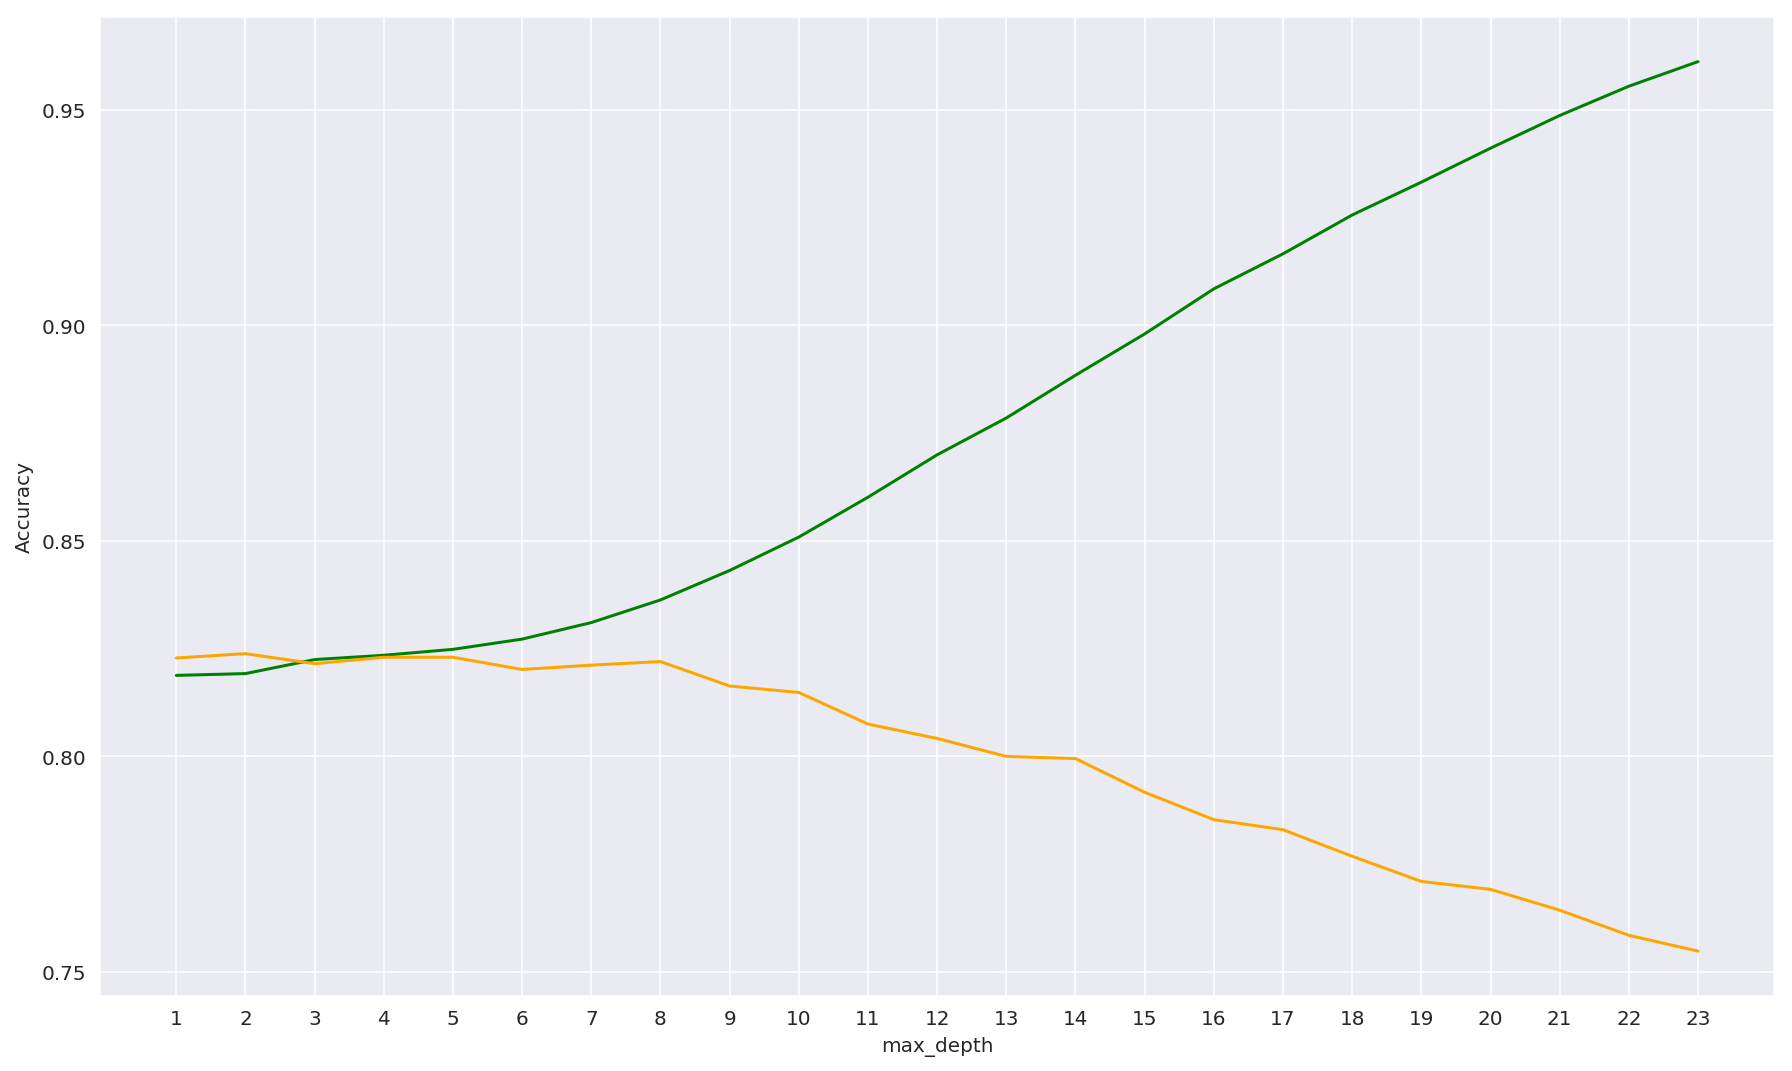

In [68]:
#Comenzamos con el primer modelo de arbol de decisión
from sklearn.tree import DecisionTreeClassifier

def trainDTModel(x, y, max_depth):
  dtModel = DecisionTreeClassifier(max_depth = max_depth)
  dtModel.fit(x, y)
  return dtModel

trainAndPredict(trainDTModel, "max_depth", range(1, 24))

De acuerdo a los resultados anteriores el arbol de decisiones no me da un valor superior al 82% de efectividad al variar la máxima profundidad. El valor más adecuado con mejores resultados tanto de entrenamiento como de pruebas debería ser 4.

Using C = 0.1 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 0.2 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 0.3 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 0.5 Accuracy in training: 0.7791666666666667 Accuracy in testing: 0.7768333333333334
Using C = 0.8 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 1.0 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 2 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 3 Accuracy in training: 0.7791666666666667 Accuracy in testing: 0.7768333333333334
Using C = 5 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334
Using C = 10 Accuracy in training: 0.7792083333333333 Accuracy in testing: 0.7768333333333334


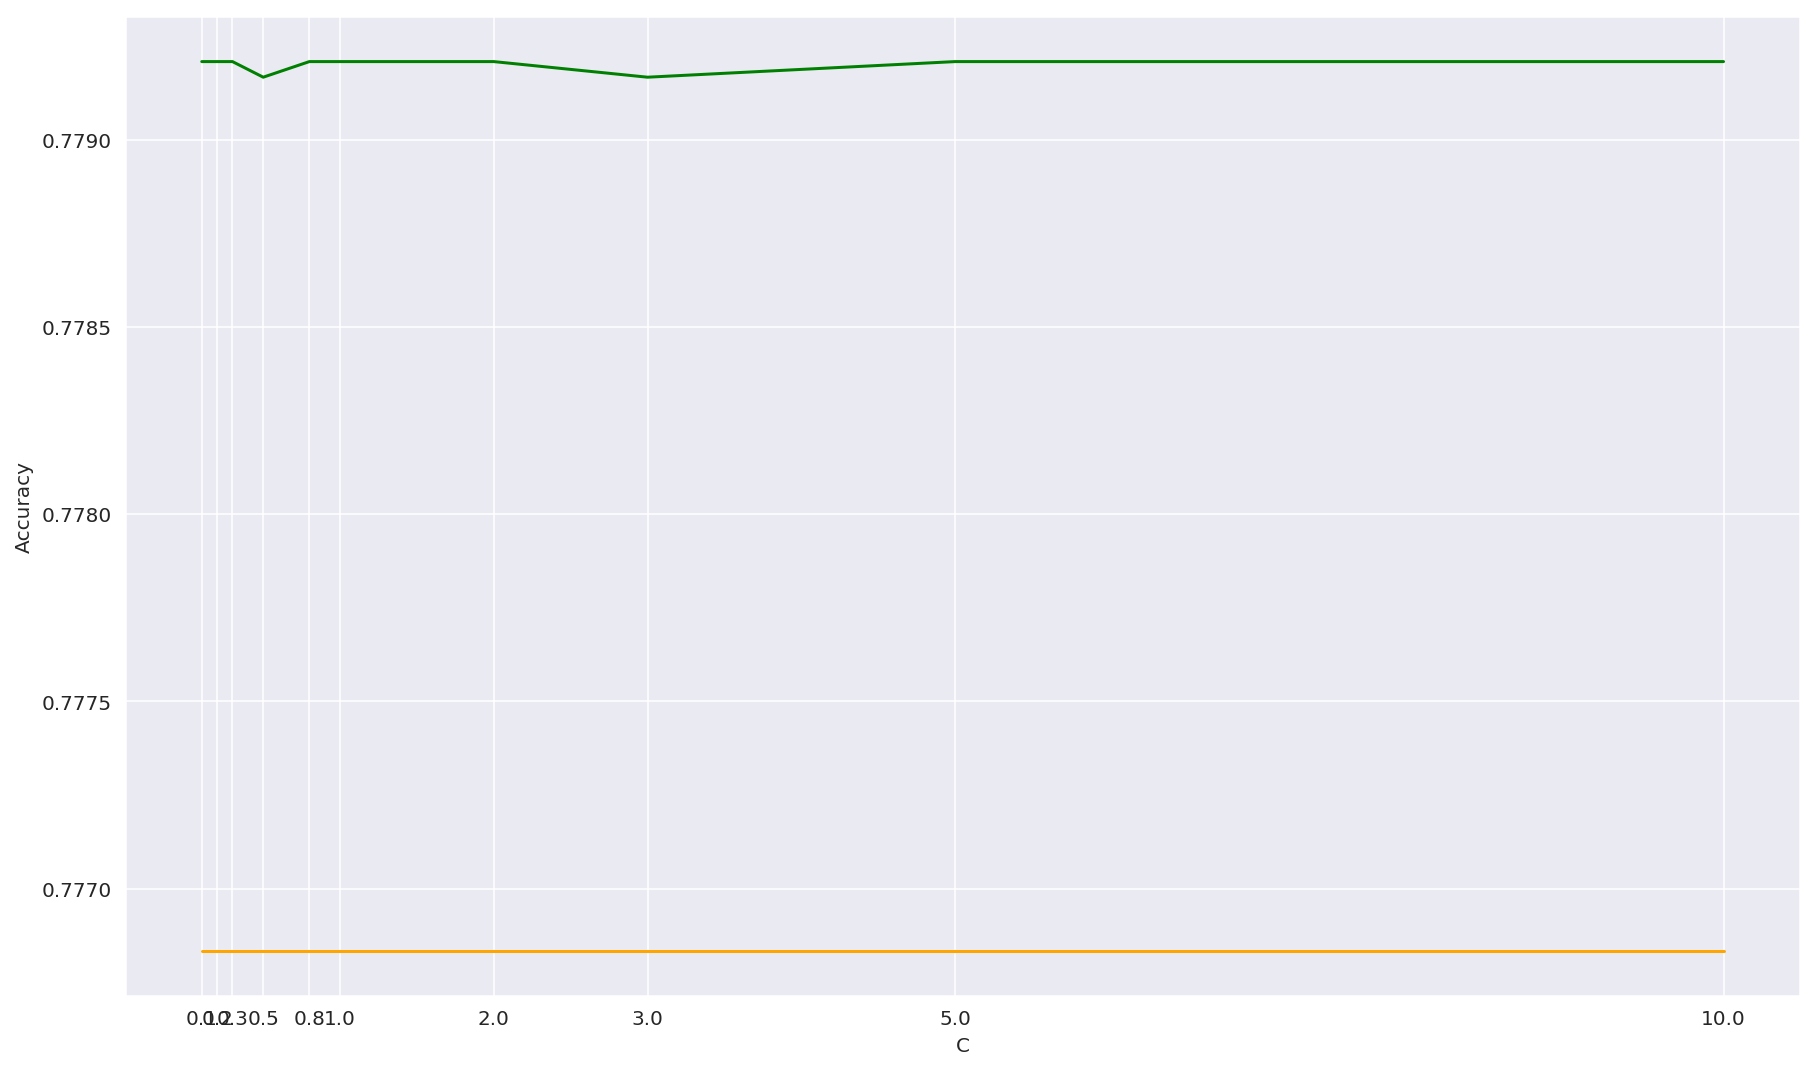

In [69]:
#Ahora probamos con regresión lógica
from sklearn.linear_model import LogisticRegression

def trainLRModel(x, y, C):
  lrModel = LogisticRegression(C = C, solver = "liblinear")
  lrModel.fit(x, y)
  return lrModel
  
trainAndPredict(trainLRModel, "C", [0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2, 3, 5, 10])

Al parecer la regresión lógica no tiene mejores resultados que el arbol de decisiones y el márgen de error de las predicciones al probar distintos valores de C no parece cambiar mucho, por tanto no sería un buen algoritmo a utilizar.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 0.1 Accuracy in training: 0.7766666666666666 Accuracy in testing: 0.7738333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 0.2 Accuracy in training: 0.6747083333333334 Accuracy in testing: 0.6768333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 0.3 Accuracy in training: 0.24875 Accuracy in testing: 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 0.5 Accuracy in training: 0.7680833333333333 Accuracy in testing: 0.765


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 0.8 Accuracy in training: 0.773125 Accuracy in testing: 0.7693333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 1.0 Accuracy in training: 0.5343333333333333 Accuracy in testing: 0.529


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 2 Accuracy in training: 0.7765416666666667 Accuracy in testing: 0.775


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 3 Accuracy in training: 0.7790833333333333 Accuracy in testing: 0.7768333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 5 Accuracy in training: 0.7230416666666667 Accuracy in testing: 0.7205


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using C = 10 Accuracy in training: 0.4875833333333333 Accuracy in testing: 0.49333333333333335


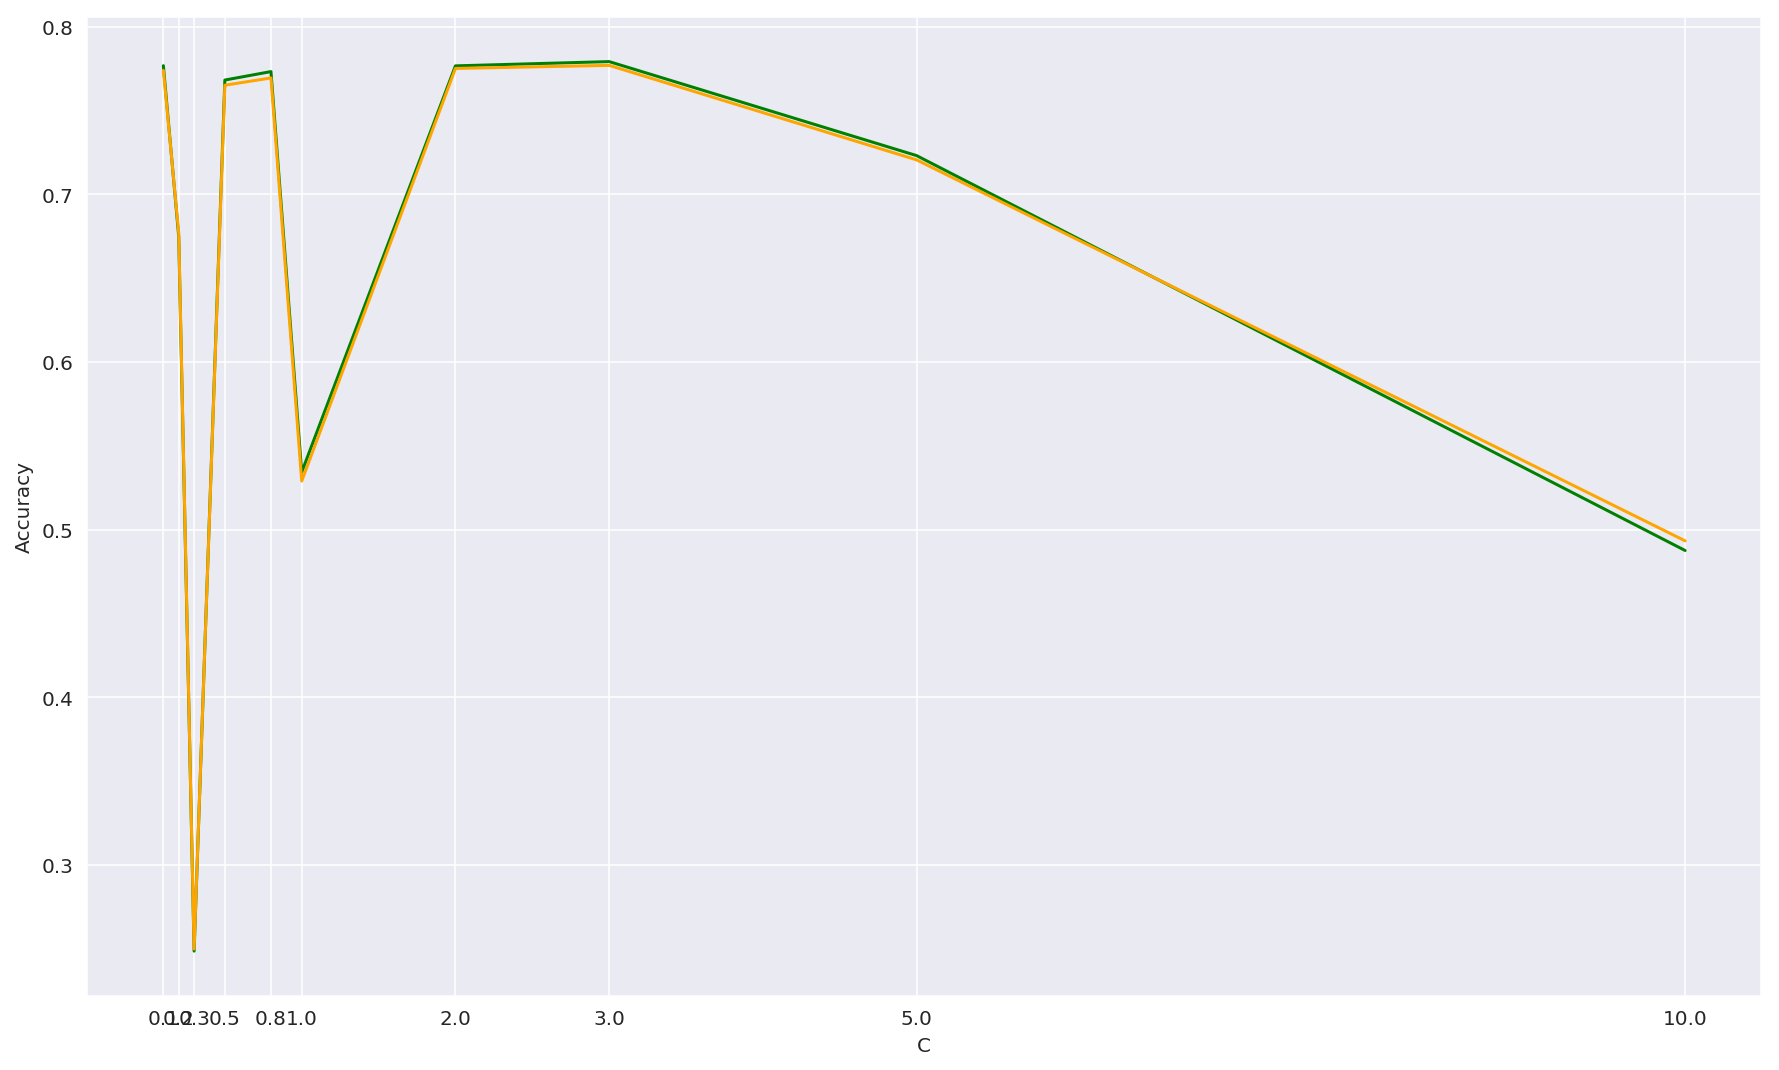

In [72]:
#Finalmente provamos con un algoritmo de Máquinas de Vectores de Soporte
from sklearn.svm import LinearSVC

def trainSVCModel(x, y, C):
  svcModel = LinearSVC(C = C)
  svcModel.fit(x, y)
  return svcModel

trainAndPredict(trainSVCModel, "C", [0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2, 3, 5, 10])

Con SVM Classifier el agoritmo utilizado ni siquiera logró converger obteniendo resultados pésimos, por tanto entre los 3 anteriores definitivamente la mejor opción sería árboles de decisión.

**Métodos de Ensamble (Ensemble)**
Los métodos de ensamble son una técnica de machine learning que utiliza la combinación de diferentes modelos base con el objetivo de obtener mejores predicciones bajo las condiciones óptimas. 
Los árboles de decisión no son los únicos métodos de ensamble que existen hoy en día pero si los más populares y relevantes, de los cuáles existen 2 tipos:
- Bagging: en este se crean múltiples subsets de datos sobre el data set original y un árbol de decisión es creado a partir de cada uno de ellos. Cada subset tendria todas las variables disponibles para su desarrollo.
- Random Forest: este método es muy parecido al anterior con la diferencia de que en vez de crear subsets con iguales variables, cada subset se genera utilizando variables aleatorias y cortando de acuerdo a estas variables.

Using learning_rate = 0.001 Accuracy in training: 0.7792916666666667 Accuracy in testing: 0.7768333333333334
Using learning_rate = 0.01 Accuracy in training: 0.8200416666666667 Accuracy in testing: 0.8231666666666667
Using learning_rate = 0.1 Accuracy in training: 0.8268333333333333 Accuracy in testing: 0.8221666666666667
Using learning_rate = 0.2 Accuracy in training: 0.8310416666666667 Accuracy in testing: 0.8208333333333333
Using learning_rate = 0.3 Accuracy in training: 0.8345833333333333 Accuracy in testing: 0.8206666666666667
Using learning_rate = 0.4 Accuracy in training: 0.8402083333333333 Accuracy in testing: 0.8193333333333334
Using learning_rate = 0.5 Accuracy in training: 0.8422916666666667 Accuracy in testing: 0.8141666666666667
Using learning_rate = 1 Accuracy in training: 0.8510833333333333 Accuracy in testing: 0.8016666666666666


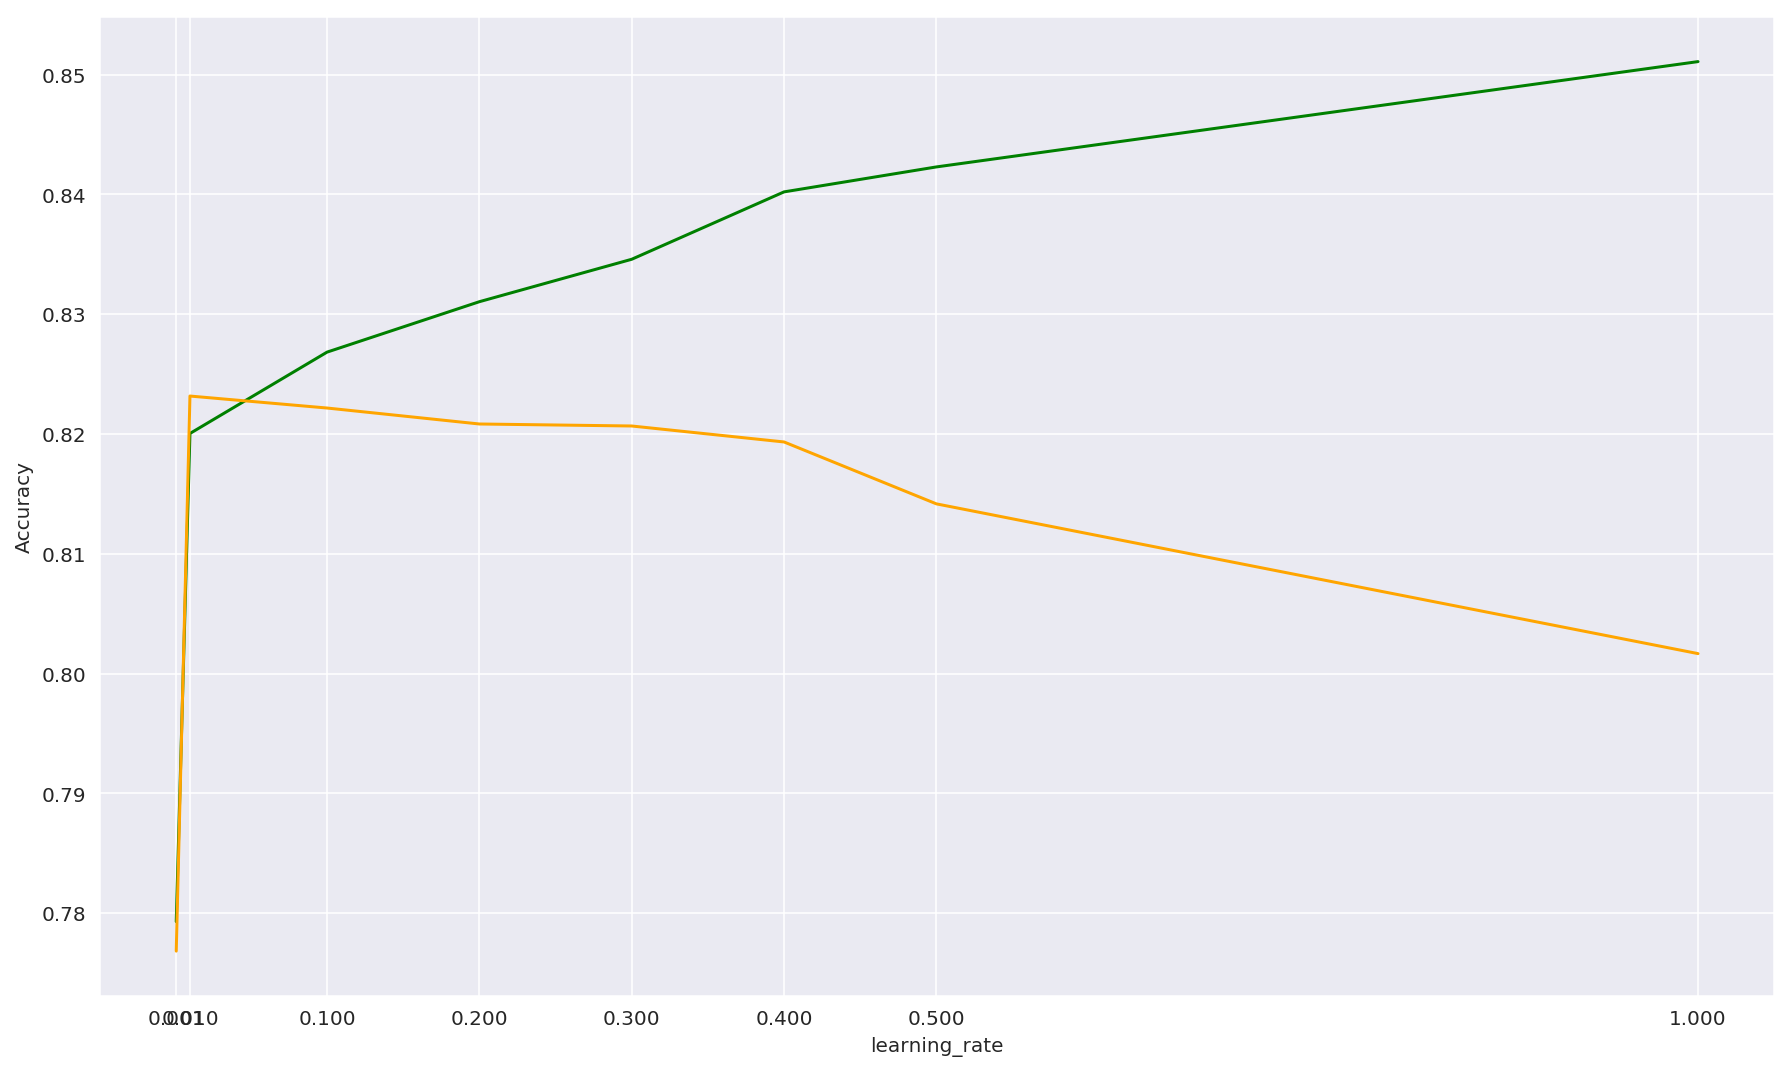

In [82]:
#Ahora exploraremos el dataset con un método de ensamble
from sklearn.ensemble import GradientBoostingClassifier

def trainGBModel(x, y, learning_rate):
  gbModel = GradientBoostingClassifier(learning_rate = learning_rate)
  gbModel.fit(x, y)
  return gbModel

trainAndPredict(trainGBModel, "learning_rate", [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1])

Finalmente este método de ensamble tampoco representa mejores resultados que un árbol de decisiones simples, en este caso un learning rate de entre 0.01 y 0.1 parece ser la mejor opción.